In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
market_data = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Hedging-of-Financial-Derivatives/Hedging with Ensemble Learning Techniques/synthetic_market_data (1).csv')

In [11]:
# Feature selection
features = market_data[['Price', 'Return', 'Volatility']]
target = market_data['Price'].shift(-1).fillna(method='ffill')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [12]:
# Define individual models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
svr = SVR(kernel='rbf')

# Create the ensemble model
ensemble = VotingRegressor([('rf', rf), ('mlp', mlp), ('svr', svr)])

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Fit individual models #This is the change
rf.fit(X_train, y_train)
mlp.fit(X_train, y_train)
svr.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = ensemble.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_svr = svr.predict(X_test)

In [13]:
# Evaluate the models
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print(f'Ensemble MSE: {mse_ensemble}')
print(f'Random Forest MSE: {mse_rf}')
print(f'MLP MSE: {mse_mlp}')
print(f'SVR MSE: {mse_svr}')

Ensemble MSE: 4.509652452916237
Random Forest MSE: 3.2842376907346646
MLP MSE: 2.599026334454343
SVR MSE: 18.33731796451989


**Hedging Strategy**

In [14]:
# Define a function to calculate delta (for simplicity, using a hypothetical approach)
def calculate_delta(price):
    return np.tanh(price / 100)

# Simulate a hedging strategy
def simulate_hedging_strategy(predictions, actual_prices):
    hedge_ratios = [calculate_delta(p) for p in predictions]
    portfolio_values = [1000000]  # Starting with a portfolio value of 1,000,000
    for i in range(1, len(actual_prices)):
        change = hedge_ratios[i-1] * (actual_prices[i] - actual_prices[i-1])
        portfolio_values.append(portfolio_values[-1] + change)
    return portfolio_values

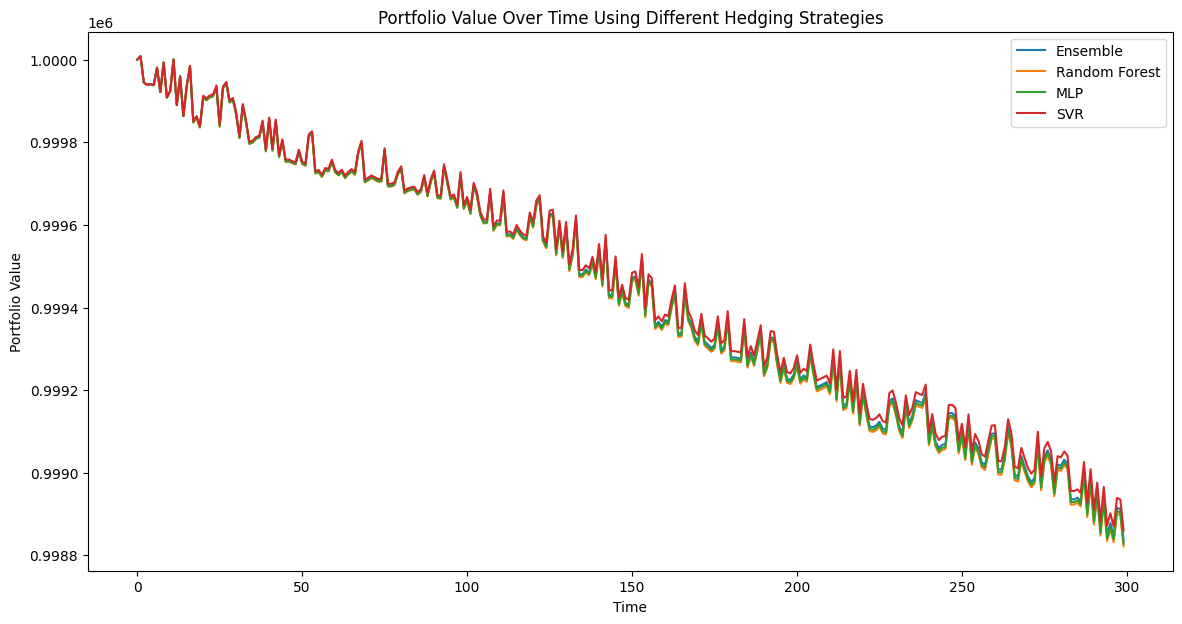

In [15]:
# Actual prices
actual_prices = X_test['Price'].values

# Portfolio values using different models
portfolio_values_ensemble = simulate_hedging_strategy(y_pred_ensemble, actual_prices)
portfolio_values_rf = simulate_hedging_strategy(y_pred_rf, actual_prices)
portfolio_values_mlp = simulate_hedging_strategy(y_pred_mlp, actual_prices)
portfolio_values_svr = simulate_hedging_strategy(y_pred_svr, actual_prices)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(portfolio_values_ensemble, label='Ensemble')
plt.plot(portfolio_values_rf, label='Random Forest')
plt.plot(portfolio_values_mlp, label='MLP')
plt.plot(portfolio_values_svr, label='SVR')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time Using Different Hedging Strategies')
plt.legend()
plt.show()